In [13]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Creating file path
EV_clean_file = "Cleaned_Data_Sets/Cleaned_EV_Data.csv"

# Reading
EV_clean_file_df = pd.read_csv(EV_clean_file, encoding="UTF-8")
EV_clean_file_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Vehicle Location Longitude,Vehicle Location Latitude
0,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,-120.56916,46.58514
1,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220,-117.16171,32.71568
2,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),22,-123.12802,44.09573
3,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),289,-120.56916,46.58514
4,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),14,-122.18384,47.80310


In [15]:
wa_df = pd.DataFrame(EV_clean_file_df.loc[EV_clean_file_df["State"] == "WA"])
bev_df = pd.DataFrame(wa_df.loc[wa_df["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"])
phev_df = pd.DataFrame(wa_df.loc[wa_df["Electric Vehicle Type"] == "Plug-in Hybrid Electric Vehicle (PHEV)"])

In [16]:
county_bev_count_df = pd.DataFrame(bev_df.groupby(["County"]).count()["Electric Vehicle Type"])
county_bev_count_df = county_bev_count_df.rename(columns={"Electric Vehicle Type":"Battery Electric Vehicle (BEV)"})
county_bev_count_df.head()

,Battery Electric Vehicle (BEV)
County,
Adams,24
Asotin,31
Benton,1050
Chelan,590
Clallam,513


In [17]:
county_bev_count_df.count()

Battery Electric Vehicle (BEV)    39
dtype: int64

In [18]:
county_phev_count_df = pd.DataFrame(phev_df.groupby(["County"]).count()["Electric Vehicle Type"])
county_phev_count_df = county_phev_count_df.rename(columns={"Electric Vehicle Type":"Plug-in Hybrid Electric Vehicle (PHEV)"})
county_phev_count_df.head()

,Plug-in Hybrid Electric Vehicle (PHEV)
County,
Adams,11
Asotin,21
Benton,517
Chelan,142
Clallam,266


In [19]:
county_phev_count_df.count()

Plug-in Hybrid Electric Vehicle (PHEV)    39
dtype: int64

In [20]:
county_bev_count_sorted = county_bev_count_df.sort_values(by=["Battery Electric Vehicle (BEV)"], ascending=False)
county_bev_count_sorted.head()

,Battery Electric Vehicle (BEV)
County,
King,52568
Snohomish,11284
Pierce,6997
Clark,5315
Thurston,3215


In [21]:
county_phev_count_sorted = county_phev_count_df.sort_values(by=["Plug-in Hybrid Electric Vehicle (PHEV)"], ascending=False)
county_phev_count_sorted.head()

,Plug-in Hybrid Electric Vehicle (PHEV)
County,
King,12696
Snohomish,2777
Pierce,2534
Clark,2083
Thurston,1322


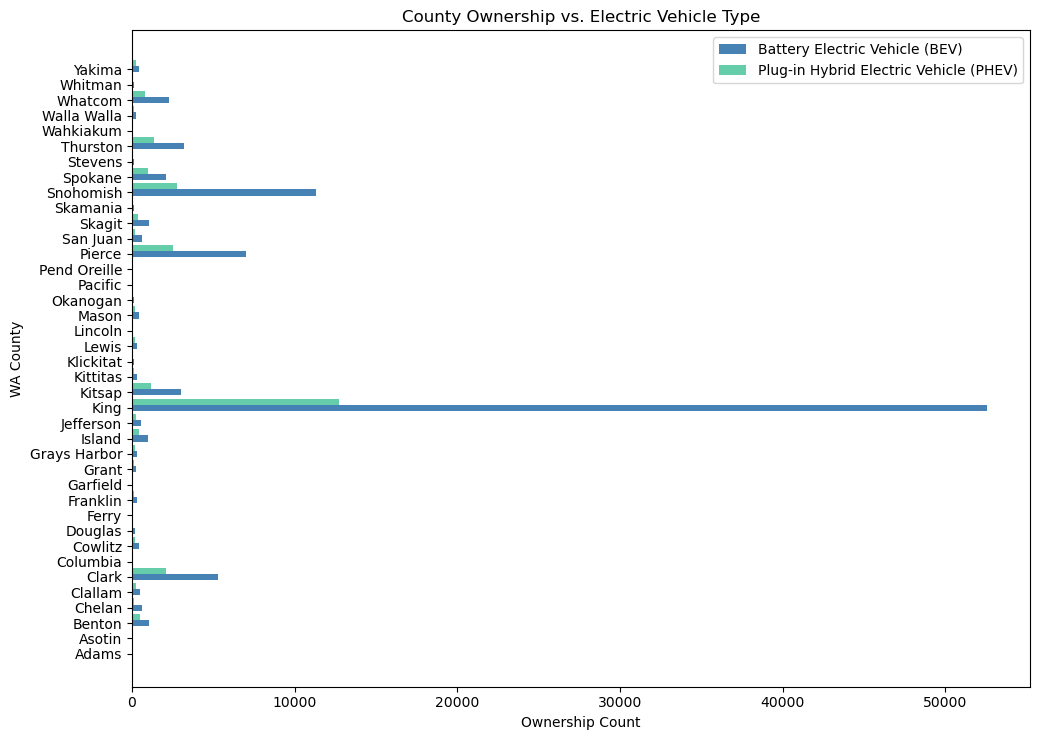

In [32]:
y_axis_ticks = county_bev_count_df.index

bev_count = county_bev_count_df["Battery Electric Vehicle (BEV)"]
phev_count = county_phev_count_df["Plug-in Hybrid Electric Vehicle (PHEV)"]

y_axis = np.arange(len(y_axis_ticks))

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

plt.barh(y_axis, bev_count, 0.4, label = "Battery Electric Vehicle (BEV)", color="steelblue")
plt.barh(y_axis + 0.4, phev_count, 0.4, label = "Plug-in Hybrid Electric Vehicle (PHEV)", color="mediumaquamarine")

plt.title("County Ownership vs. Electric Vehicle Type")
plt.yticks(y_axis, y_axis_ticks)
plt.xlabel("Ownership Count")
plt.ylabel("WA County")
plt.legend()

plt.savefig("Images/Ownership_vs_EVType_bar.png")
plt.show()